1485
1348


<Figure size 640x480 with 0 Axes>

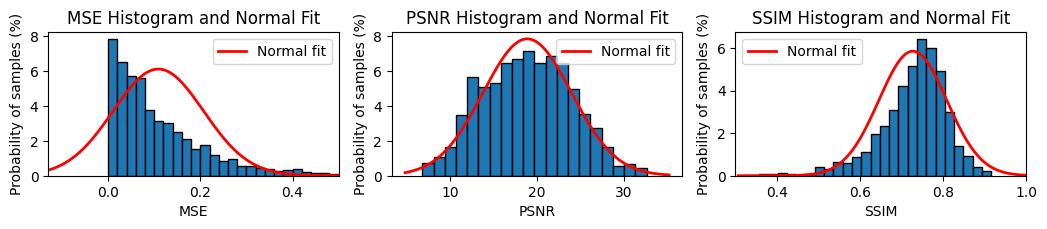

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re
from matplotlib.ticker import FuncFormatter

def plotstatistic(psnr_list, ssim_list, mse_list, nmse_list, statisticdir):
    # 绘制统计图
    def to_percent(y,position):
        return str(int((100*y))) #+"%"#这里可以用round（）函数设置取几位小数
    # binss0 = 40
    binss = 25

    plt.clf()
    plt.figure(figsize=(10.7, 6))


    #-----------------------------------mse-------------------------------------------
    mse_threshold = 0.5
    mse_list = [m for m in mse_list if m <= mse_threshold]
    print(len(mse_list))
    # MSE 直方图和正态分布曲线
    plt.subplot(3, 3, 1)
    # plt.subplot(4, 4, 1)
    # counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(mse_list, bins=25, edgecolor='black', range=(0,0.5), density=True)
    mu, std = norm.fit(mse_list)
    # x = np.linspace(-5, 15, 1000)
    x = np.linspace(min(mse_list)-1, max(mse_list)+1, 1000)
    plt.plot(x, norm.pdf(x, mu, std)*1.5, 'r-', linewidth=2, label='Normal fit')
    # mse_pdf = norm.pdf(x, mu, std)
    # mse_pdf_normalized = mse_pdf / mse_pdf.max() * counts.max()  # 归一化到与直方图一致的高度
    # plt.plot(x, mse_pdf_normalized, 'r-', linewidth=2, label='Normal fit')
    plt.xlim(-0.13, 0.5)  # 限制横坐标范围
    plt.xlabel('MSE')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('MSE Histogram and Normal Fit')
    plt.legend()
    # #-----------------------------------mse-------------------------------------------

    # # #-----------------------------------nmse-------------------------------------------
    # nmse_threshold = 1.5
    # nmse_list = [m for m in nmse_list if m <= nmse_threshold]
    # plt.subplot(4, 4, 2)
    # # counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True, stacked=True)
    # counts, bins, patches = plt.hist(nmse_list, bins=binss, edgecolor='black', range=(0,1.25), density=True)
    # mu, std = norm.fit(nmse_list)
    # # x = np.linspace(-5, 15, 1000)
    # x = np.linspace(min(nmse_list)-0.5, max(nmse_list)+0.2, 1000)
    # plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
    # # plt.xlim(-0.1, 0.3)  # 限制横坐标范围
    # plt.xlabel('NMSE')
    # # plt.ylabel('Probability of samples')
    # plt.ylabel('Probability of samples (%)')
    # plt.title('NMSE Histogram and Normal Fit')
    # plt.legend()


    #-----------------------------------PSNR-------------------------------------------
    # PSNR 直方图和正态分布曲线
    plt.subplot(3, 3, 2)
    # plt.subplot(4, 4, 3)
    # counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(psnr_list, bins=binss-5, edgecolor='black', density=True)
    fomatter=FuncFormatter(to_percent)
    plt.gca().yaxis.set_major_formatter(fomatter)
    mu, std = norm.fit(psnr_list)
    # x = np.linspace(15,45, 1000)
    x = np.linspace(min(psnr_list)-2, max(psnr_list)+2.6, 1000)
    plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
    # plt.xlim(-5, 15)  # 限制横坐标范围
    plt.xlabel('PSNR')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('PSNR Histogram and Normal Fit')
    plt.legend()

    #-----------------------------------SSIM-------------------------------------------
    # SSIM 直方图和正态分布曲线
    plt.subplot(3, 3, 3)
    # plt.subplot(4, 4, 4)
    # counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True, stacked=True)
    counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True)
    # fomatter=FuncFormatter(to_percent)
    # plt.gca().yaxis.set_major_formatter(fomatter)
    mu, std = norm.fit(ssim_list)
    # x = np.linspace(0.6,1.1, 1000)
    x = np.linspace(min(ssim_list)-0.05, max(ssim_list)+0.1, 1000)
    plt.plot(x, norm.pdf(x, mu, std)*1.2, 'r-', linewidth=2, label='Normal fit')
    plt.xlim(0.3, 1)  # 限制横坐标范围
    plt.xlabel('SSIM')
    # plt.ylabel('Probability of samples')
    plt.ylabel('Probability of samples (%)')
    plt.title('SSIM Histogram and Normal Fit')
    plt.legend()

    plt.tight_layout()
    plt.show()
    # plt.savefig(statisticdir)

with open('/mnt/SrvUserDisk/JiangXiaotian/workspace/3DEM/output/inference/1207_TransConv_trainmulval6/alog.txt', 'r') as f:
    lines = f.readlines()
# 初始化列表变量
psnrs = []
ssims = []
mses = []
nmses = []
binss = 40
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1)) 
        nmse = float(re.search(r'nme(\d+\.\d+)', line).group(1)) 
        # 将值添加到对应的列表中
        psnrs.append(psnr)
        ssims.append(ssim)
        mses.append(mse)
        nmses.append(nmse)

print(len(mses))
statisdir = 'sta.png'

plotstatistic(psnrs,ssims,mses,nmses,statisdir)
# plotstatistic2(psnrs,ssims,mses,statisdir)